<a href="https://colab.research.google.com/github/Nidzoki/PMFST_IntroToDS_Examples_of_Good_Practice/blob/main/3/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Podaci**

1. **Titanic Dataset** - klasifikacija preživjelih
2. **California Housing Dataset** - predikcija cijena nekretnina

---

## Priprema - Učitavanje biblioteka i podataka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

# Postavljanje stila za grafove
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Biblioteke uspješno učitane!")

Biblioteke uspješno učitane!


---

# DIO 1: TITANIC DATASET

Ovaj dataset sadrži informacije o putnicima Titanica. Cilj je predvidjeti tko je preživio brodolom.

In [2]:
# Učitavanje Titanic dataseta
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

print(f"Dimenzije dataseta: {titanic.shape}")
print(f"\nPrvih 5 redaka:")
titanic.head()

Dimenzije dataseta: (891, 12)

Prvih 5 redaka:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Pregled strukture podataka
print("Informacije o datasetu:")
titanic.info()

print("\n" + "="*50)
print("Opisne statistike:")
titanic.describe()

Informacije o datasetu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Opisne statistike:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Zadatak 1.1: Razdvajanje složenih značajki

Kolona `Name` sadrži ime, prezime i titulu (Mr., Mrs., Miss., itd.).

**Vaš zadatak:**
1. Ekstrahirajte titulu iz imena
2. Kreirajte novu kolonu `Title`
3. Analizirajte distribuciju titula

**Hint:** Titula se nalazi između zareza i točke, npr. "Braund, Mr. Owen Harris" → "Mr"

Distribucija titula:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


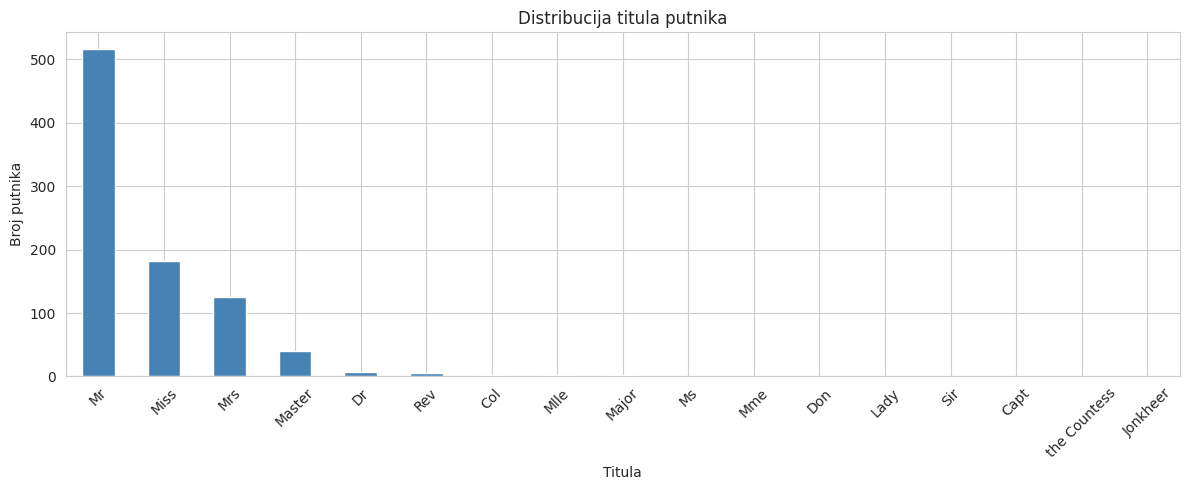

In [4]:
# 1. Ekstrahiranje titule
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# 2. Prikaz distribucije titula
print("Distribucija titula:")
print(titanic['Title'].value_counts())

# 3. Vizualizacija
plt.figure(figsize=(12, 5))
titanic['Title'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribucija titula putnika')
plt.xlabel('Titula')
plt.ylabel('Broj putnika')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Zadatak 1.2: Kreiranje značajki - Veličina obitelji

**Vaš zadatak:**
1. Kreirajte novu značajku `FamilySize` koja predstavlja ukupnu veličinu obitelji
   - FamilySize = SibSp (broj braće/sestara) + Parch (broj roditelja/djece) + 1 (sam putnik)
2. Kreirajte kategoričku varijablu `FamilyType`:
   - 'Sam' ako je FamilySize = 1
   - 'Mala' ako je FamilySize između 2 i 4
   - 'Velika' ako je FamilySize > 4
3. Analizirajte stopu preživljavanja po tipu obitelji

In [5]:


# 1. Kreiranje FamilySize
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# 2. Kreiranje FamilyType
def classify_family(size):
    if size == 1:
        return 'Sam'
    elif 2 <= size <= 4:
        return 'Mala'
    else:
        return 'Velika'
    pass

titanic['FamilyType'] = titanic['FamilySize'].apply(classify_family)

# 3. Analiza stope preživljavanja
survival_by_family =  titanic.groupby('FamilyType')['Survived'].mean()
print("Stopa preživljavanja po tipu obitelji:")
print(survival_by_family)

Stopa preživljavanja po tipu obitelji:
FamilyType
Mala      0.578767
Sam       0.303538
Velika    0.161290
Name: Survived, dtype: float64


## Zadatak 1.3: Enkodiranje kategorijskih varijabli

**Vaš zadatak:**
1. Primijenite **One-Hot Encoding** na kolonu `Embarked` (luka ukrcaja)
2. Primijenite **Target Encoding** na kolonu `Title`
   - Zamijenite svaku titulu prosječnom stopom preživljavanja za tu titulu

**Napomena:** Pazite na data leakage kod target encoding-a!

In [9]:
from sklearn.preprocessing import OneHotEncoder
# Priprema - popunjavanje nedostajućih vrijednosti
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# 1. One-Hot Encoding za Embarked
embarked_encoder = OneHotEncoder(sparse_output=False)
embarked_encoded = embarked_encoder.fit_transform(titanic[['Embarked']])
embarked_df = pd.DataFrame(embarked_encoded, columns=embarked_encoder.get_feature_names_out(['Embarked']))
titanic = pd.concat([titanic, embarked_df], axis=1)
titanic.drop('Embarked', axis=1, inplace=True)


# 2. Target Encoding za Title
# Calculate the mean survival rate for each title on the training data to avoid data leakage
title_survival_rate = titanic.groupby('Title')['Survived'].mean()

# Map the survival rates back to the original dataframe
titanic['Title_Encoded'] = titanic['Title'].map(title_survival_rate)

print("Target encoding za Title:")
print(titanic[['Title', 'Title_Encoded', 'Survived']].head())

print("\nOne-Hot Encoded Embarked:")
print(titanic[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

Target encoding za Title:
  Title  Title_Encoded  Survived
0    Mr       0.156673         0
1   Mrs       0.792000         1
2  Miss       0.697802         1
3   Mrs       0.792000         1
4    Mr       0.156673         0

One-Hot Encoded Embarked:
   Embarked_C  Embarked_Q  Embarked_S
0         0.0         0.0         1.0
1         1.0         0.0         0.0
2         0.0         0.0         1.0
3         0.0         0.0         1.0
4         0.0         0.0         1.0


---

# DIO 2: CALIFORNIA HOUSING DATASET

Ovaj dataset sadrži informacije o cijenama kuća u Kaliforniji.

In [10]:
# Učitavanje California Housing dataseta
housing_data = fetch_california_housing(as_frame=True)
housing = housing_data.frame

print(f"Dimenzije dataseta: {housing.shape}")
print(f"\nOpis značajki:")
print(housing_data.DESCR[:1000])  # Prvi dio opisa
print("\nPrvih 5 redaka:")
housing.head()

Dimenzije dataseta: (20640, 9)

Opis značajki:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# Pregled statistika
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Zadatak 2.1: Kreiranje značajki interakcije

**Vaš zadatak:**
1. Kreirajte značajku `RoomsPerHousehold` = AveRooms × broj kućanstava po bloku
   - Hint: to je zapravo `AveRooms` jer je već prosječno
2. Kreirajte značajku `BedroomsRatio` = AveBedrms / AveRooms (udio spavaćih soba)
3. Kreirajte značajku `PopulationPerHousehold` = Population / AveOccup
4. Vizualizirajte korelaciju novih značajki s cijenom (`MedHouseVal`)

In [17]:
# 1-3. Kreiranje novih značajki
housing['RoomsPerHousehold'] = housing['AveRooms']
housing['BedroomsRatio'] = housing['AveBedrms']/housing['AveRooms']
housing['PopulationPerHousehold'] = housing['Population']/housing['AveOccup']

# 4. Analiza korelacija
new_features = ['BedroomsRatio', 'PopulationPerHousehold', 'MedHouseVal']
correlation = housing.corr()[new_features].abs().sort_values(by='MedHouseVal', ascending=False)

print("Korelacija novih značajki s cijenom:")
print(correlation)

Korelacija novih značajki s cijenom:
                        BedroomsRatio  PopulationPerHousehold  MedHouseVal
MedHouseVal                  0.255624                0.065843     1.000000
MedInc                       0.615479                0.013033     0.688075
BedroomsRatio                1.000000                0.067022     0.255624
AveRooms                     0.418704                0.080598     0.151948
RoomsPerHousehold            0.418704                0.080598     0.151948
Latitude                     0.114302                0.071035     0.144160
HouseAge                     0.136367                0.302916     0.105623
PopulationPerHousehold       0.067022                1.000000     0.065843
AveBedrms                    0.055817                0.054833     0.046701
Longitude                    0.092868                0.055310     0.045967
Population                   0.037075                0.907222     0.024650
AveOccup                     0.002881                0.027309  

## Zadatak 2.2: Skaliranje značajki

**Vaš zadatak:**
1. Prvo podijelite podatke na train i test setove (80/20)
2. Primijenite **StandardScaler** na numeričke značajke
3. Primijenite **MinMaxScaler** na numeričke značajke
4. Usporedite distribucije prije i nakon skaliranja

**VAŽNO:** Pazite na data leakage - fitajte scaler samo na train setu!

In [19]:

# Odabir značajki za skaliranje
features_to_scale = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
X = housing[features_to_scale]
y = housing['MedHouseVal']

# 1. Podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. StandardScaler
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train, y_train)
X_test_standard = scaler_standard.fit_transform(X_test, y_test)

# 3. MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train, y_train)
X_test_minmax = scaler_minmax.fit_transform(X_test, y_test)

print("Originalni podaci - statistike:")
print(X_train.describe())

Originalni podaci - statistike:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.880754     28.608285      5.435235      1.096685   1426.453004   
std        1.904294     12.602499      2.387375      0.433215   1137.056380   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.566700     18.000000      4.452055      1.006508    789.000000   
50%        3.545800     29.000000      5.235874      1.049286   1167.000000   
75%        4.773175     37.000000      6.061037      1.100348   1726.000000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup  
count  16512.000000  
mean       3.096961  
std       11.578744  
min        0.692308  
25%        2.428799  
50%        2.817240  
75%        3.280000  
max     1243.333333  


## Zadatak 2.3: Detektiranje multikolinearnosti

**Vaš zadatak:**
1. Izračunajte korelacijsku matricu za sve numeričke značajke
2. Vizualizirajte je pomoću heatmap-a
3. Identificirajte parove značajki s korelacijom > 0.8
4. Za visoko korelirane parove, odaberite jednu značajku koju biste zadržali

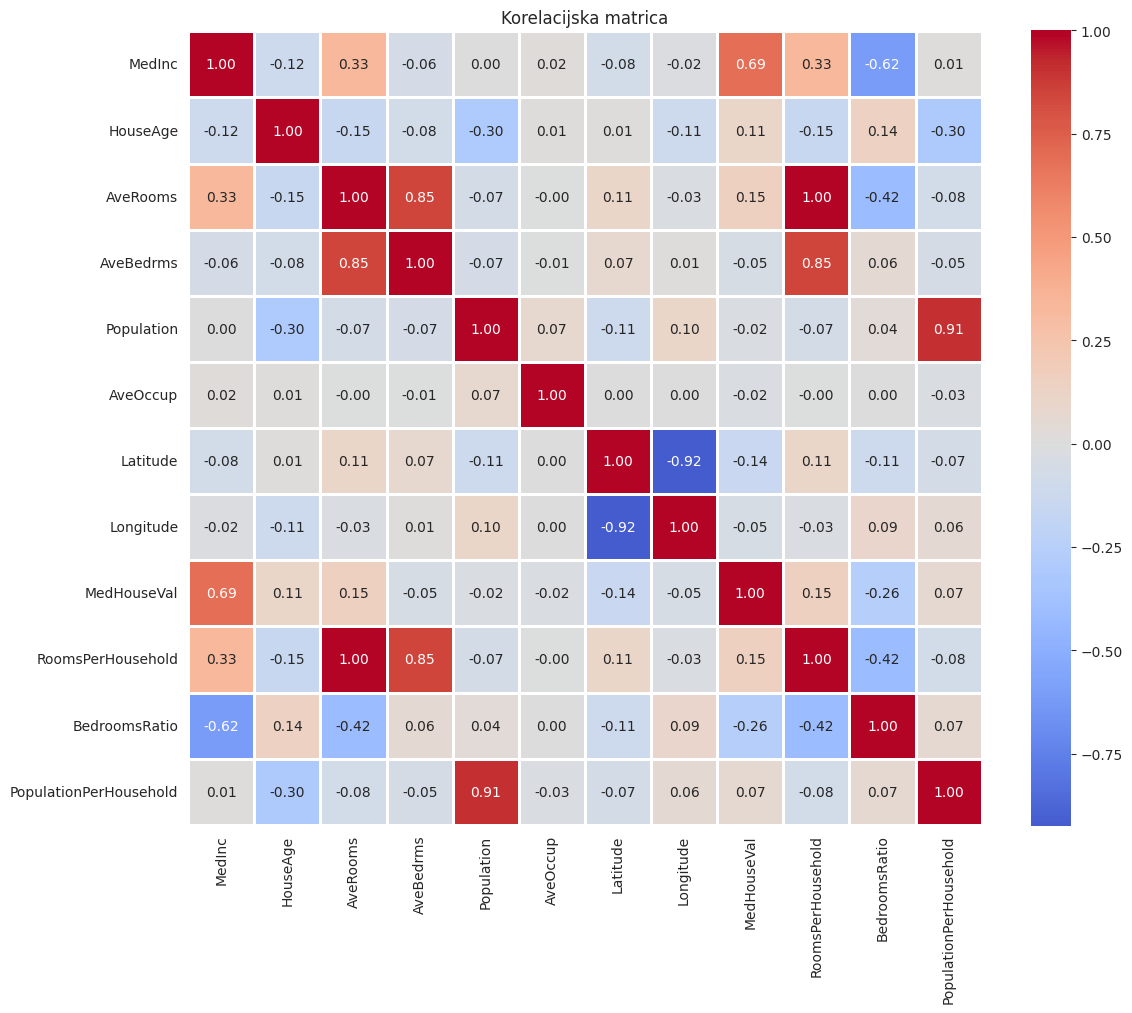

In [23]:
# TODO: Vaše rješenje ovdje

# 1. Korelacijska matrica
correlation_matrix = housing.corr()

# 2. Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Korelacijska matrica')
plt.tight_layout()
plt.show()


## Zadatak 2.4: Matematičke transformacije

Značajka `Population` ima jako iskrivljenu distribuciju (skewed).

**Vaš zadatak:**
1. Vizualizirajte originalnu distribuciju značajke `Population`
2. Primijenite log transformaciju
3. Primijenite square root transformaciju  
4. Usporedite sve tri distribucije vizualno

Statistike za Population:
count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

Skewness: 4.94


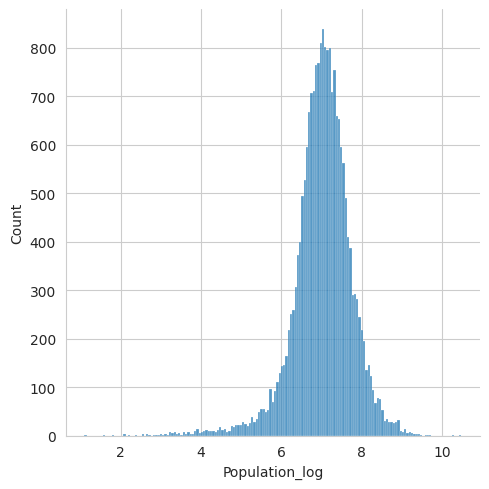

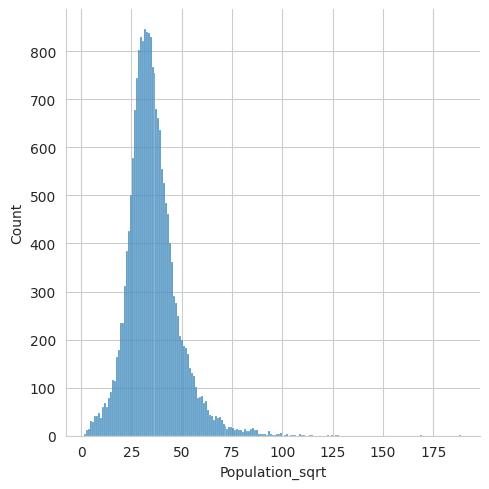

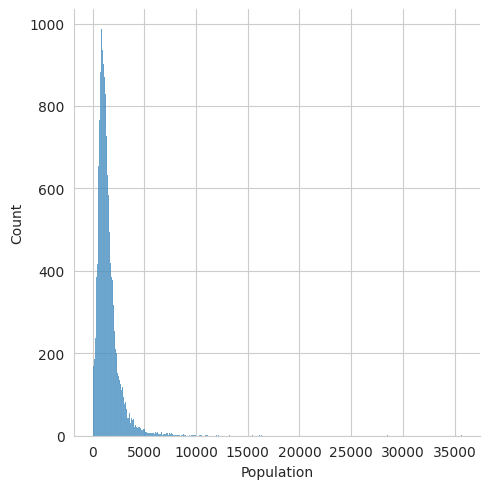

In [27]:
# TODO: Vaše rješenje ovdje

# 1. Analiza originalne distribucije
print("Statistike za Population:")
print(housing['Population'].describe())
print(f"\nSkewness: {housing['Population'].skew():.2f}")

# 2. Log transformacija
housing['Population_log'] = housing['Population'].apply(np.log)

# 3. Square root transformacija
housing['Population_sqrt'] = housing['Population'].apply(np.sqrt)

# 4. Vizualizacija

sns.displot(housing, x = 'Population_log')
sns.displot(housing, x = 'Population_sqrt')
sns.displot(housing, x = 'Population')